In [1]:
using Printf
using Random
using LinearAlgebra
using PlotlyJS
rng = MersenneTwister(18);

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2086994279471320156\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4379900829190101657\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2086994279471320156\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
function pretty_print(v)
    @printf "["
    for i=1:length(v)
        @printf "%8.5f" v[i]
        if i < length(v)
            @printf "  "
        end
    end
    @printf "]\n"
end    

pretty_print (generic function with 1 method)

In [3]:
# Size of matrix
n = 4
X = rand(rng, n, n)
X, = qr(X)

Λ = diagm(0 => Float32[4.0^(-i) for i=0:n-1])

A = X * Λ / X

4×4 Array{Float64,2}:
 0.48757   0.234468  0.209575  0.175088
 0.234468  0.398881  0.230961  0.282065
 0.209575  0.230961  0.211785  0.153633
 0.175088  0.282065  0.153633  0.229889

In [4]:
r = 2
Qk = rand(rng, n, r)

for k=1:4
    Qk = A * Qk
    F = qr(Qk); Qk = F.Q
    
    # This step is optional; it makes the solution unique
    for j=1:2
        if Qk[1,j] * X[1,j] < 0
            Qk[:,j] = -Qk[:,j]
            # This avoids sign differences
        end
    end
    
    println("\nIteration ",k)
    pretty_print(Qk[:,1])
    pretty_print(X[:,1])
    pretty_print(Qk[:,2])
    pretty_print(X[:,2])
end


Iteration 1
[-0.57523  -0.56989  -0.41021  -0.41960]
[-0.57255  -0.57607  -0.40321  -0.42161]
[ 0.75642  -0.48586   0.05824  -0.43403]
[ 0.79309  -0.48973  -0.05163  -0.35848]

Iteration 2
[-0.57355  -0.57532  -0.40354  -0.42097]
[-0.57255  -0.57607  -0.40321  -0.42161]
[ 0.78512  -0.49235  -0.02272  -0.37505]
[ 0.79309  -0.48973  -0.05163  -0.35848]

Iteration 3
[-0.57282  -0.57590  -0.40321  -0.42147]
[-0.57255  -0.57607  -0.40321  -0.42161]
[ 0.79117  -0.49061  -0.04433  -0.36248]
[ 0.79309  -0.48973  -0.05163  -0.35848]

Iteration 4
[-0.57262  -0.57603  -0.40320  -0.42157]
[-0.57255  -0.57607  -0.40321  -0.42161]
[ 0.79261  -0.48997  -0.04980  -0.35947]
[ 0.79309  -0.48973  -0.05163  -0.35848]


In [5]:
Qk = rand(rng, n, r)
niter = 30
err = zeros(niter,2)

for k=1:niter
    Qk = A * Qk
    F = qr(Qk)
    Qk = Matrix(F.Q); Rk = F.R
    for j=1:2
        if Qk[1,j] * X[1,j] < 0
            Qk[:,j] = -Qk[:,j]
        end
        err[k,j] = norm(Qk[:,j] - X[:,j])
    end
end
err

30×2 Array{Float64,2}:
 0.0673486    1.53041
 0.0144416    0.923675
 0.00357035   0.341001
 0.000891959  0.0889157
 0.00022298   0.0222908
 5.57448e-5   0.00557368
 1.39362e-5   0.00139343
 3.48405e-6   0.000348359
 8.71013e-7   8.70897e-5
 2.17753e-7   2.17724e-5
 5.44383e-8   5.44311e-6
 1.36096e-8   1.36078e-6
 3.40239e-9   3.40194e-7
 ⋮            
 8.30696e-13  8.30551e-11
 2.07667e-13  2.07637e-11
 5.18536e-14  5.19091e-12
 1.31167e-14  1.29765e-12
 3.24918e-15  3.2435e-13
 7.77156e-16  8.11155e-14
 2.6037e-16   2.022e-14
 3.18887e-16  4.99396e-15
 2.54384e-16  1.22251e-15
 3.18887e-16  3.81576e-16
 2.54384e-16  3.37732e-16
 3.18887e-16  2.50666e-16

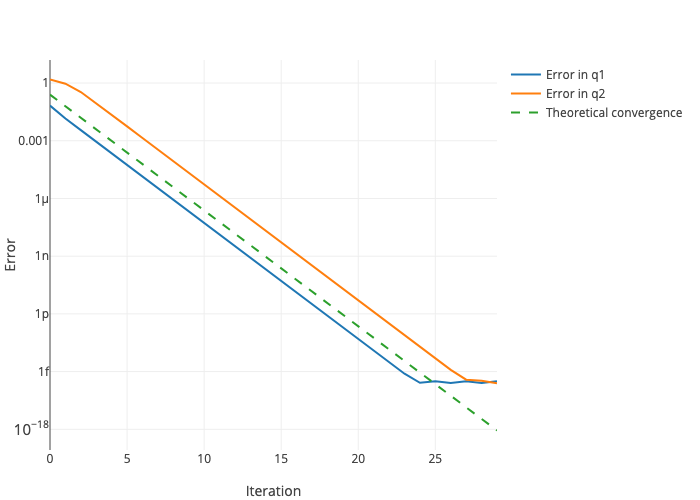

In [6]:
t1 = scatter(y=err[:,1], name="Error in q1")
t2 = scatter(y=err[:,2], name="Error in q2")
t3 = scatter(y=[4.0^(-i) for i=1:niter],
    name="Theoretical convergence", line_dash="dash")
plot([t1, t2, t3],
    Layout(yaxis_type="log",
        xaxis_title="Iteration", yaxis_title="Error", 
        width=600))